[3e-05, 0.0001, 0.0003, 0.001, 0.03]
(0.000371324, 0.000411753, 0.000308519, 0.000410865) 3e-05
(0.000371616, 0.000411239, 0.000308552, 0.00041034) 0.0001
(0.000371575, 0.000411109, 0.000308515, 0.000410208) 0.0003
(0.000371653, 0.000411084, 0.000308508, 0.000410186) 0.001
(None, None, None, None) 0.03
dim=32
[1e-20, 3e-20, 1e-19, 3e-19, 1e-18, 3e-18, 1e-17, 3e-17, 1e-16, 3e-16, 1e-15, 3e-15, 1e-14, 3e-14, 1e-13, 3e-13, 1e-12, 3e-12, 1e-11, 3e-11, 1e-10, 3e-10, 1e-09, 3e-09, 1e-08, 3e-08, 1e-07, 3e-07, 1e-06, 3e-06, 1e-05, 3e-05]
(1.77011e-05, 1.66284, 3.08483e-05, 1.6627) 1e-20
(1.53354e-05, 1.66286, 2.98905e-05, 1.66271) 3e-20
(1.40135e-05, 1.66285, 3.13089e-05, 1.66271) 1e-19
(2.16126e-06, 1.66282, 3.53454e-05, 1.6627) 3e-19
(1.28661e-05, 1.66281, 3.20931e-05, 1.6627) 1e-18
(1.48126e-05, 1.66283, 2.93784e-05, 1.6627) 3e-18
(1.46206e-05, 1.66287, 3.10142e-05, 1.66271) 1e-17
(7.12752e-06, 1.66284, 3.13451e-05, 1.66271) 3e-17
(4.93884e-06, 1.6628, 3.53014e-05, 1.6627) 1e-16
(7.50765e-0

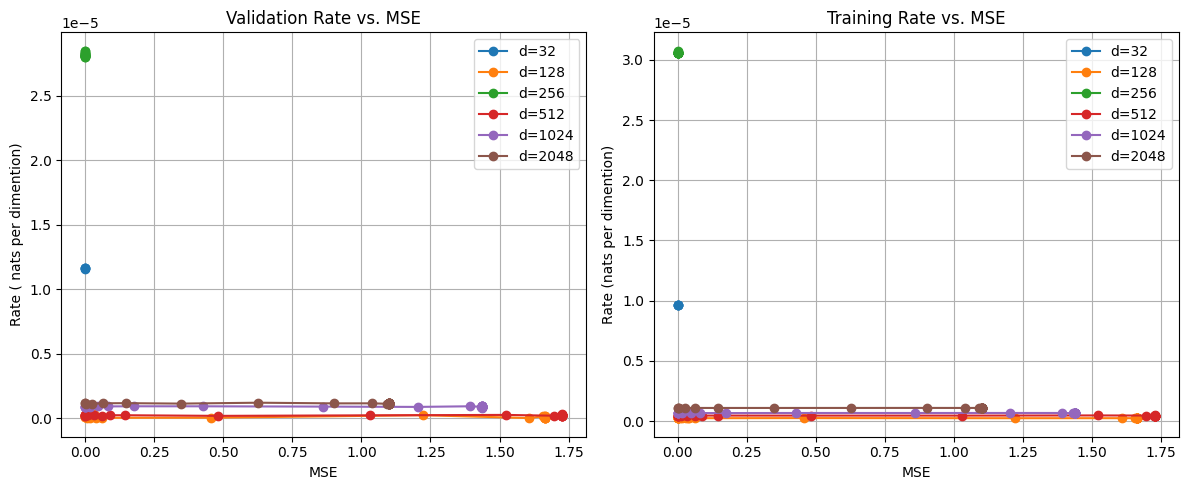

In [98]:
### dimention 별 RD 한번에 그리기
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob

# 디렉토리 경로 설정

# directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d={dim}_b=1024'
epochs = [19, 19, 19, 19, 19, 19]
units=['500_500', '1000_1000_1000', '500_500', '1000_1000_1000', '1000_1000_1000', '1000_1000_1000']
dims = [32, 128, 256, 512, 1024, 2048]

# epochs = [88, 88]
# units=['500_500','500_500']
# dims = [32, 256]

# epochs = [19, 19, 19, 19]
# units=['1000_1000_1000', '1000_1000_1000', '1000_1000_1000', '1000_1000_1000']
# dims = [128, 512, 1024, 2048]

# directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_normalized_d={dim}_b={b}_e={e}'
# epochs_name = [50, 50, 50, 100]
# batchs = [1024, 1024, 1024, 512]
# units=['2000_2000_2000', '2000_2000_2000', '2000_2000_2000', '2000_2000_2000']
# dims = [512, 1024, 2048, 4096]
# epoch = 49

# # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_normalized_2_d={dim}_b={b}_e={e}'
# epochs_name = [100, 100]
# batchs = [1024, 512]
# units=['2000_2000', '2000_2000']
# dims = [2048, 4096]
# epoch = 99
# prior = 'prior_type=gmm_1' 

total_data = {}
def get_rate_mse(e, data):
    for entry in data:
        if entry['epoch'] == e:
            return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
    return None, None, None, None  # 해당 epoch이 없을 경우

for i in range(len(dims)):
    # e = epochs_name[i]
    unit = units[i]
    dim = dims[i]
    # b = batchs[i]
    epoch = epochs[i]
    prior = 'prior_type=gmm_1' 

    # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_normalized_2_d={dim}_b={b}_e={e}'
    directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d={dim}_b=1024'
    
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path) and f'units={unit}' in file_path and prior in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if (f'lmbda={l}' in file_path) and f'units={unit}' in file_path and prior in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[l].append(json.loads(line))
        
    data = [get_rate_mse(epoch, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
            
    for i in range(len(lmbdas)):
        print(data[i], lmbdas[i])
    print(f'dim={dim}')
    if dim == 2048:
        print(len(data))
        data = data[:30]
    total_data[dim] = data

def divide_non_none_elements(input_list, n):
    # 각 요소가 None이 아닐 경우 n으로 나누고, None일 경우 그대로 유지
    # return [x / n if x is not None else x for x in input_list]
    return [x / n for x in input_list if x is not None]
plt.figure(figsize=(12, 5))

# 첫 번째 서브플롯: validation 그래프
plt.subplot(1, 2, 1)  # 2행 1열에서 첫 번째 위치
for i in range(len(dims)):
    epoch = epochs[i]
    unit = units[i]
    dim = dims[i]

    val_rate = [entry[0] for entry in total_data[dim]]
    val_mse = [entry[1] for entry in total_data[dim]]

    val_rate = divide_non_none_elements(val_rate, dim)
    val_mse = divide_non_none_elements(val_mse, 1)

    plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=f'd={dim}')
    
plt.title(f'Validation Rate vs. MSE')
plt.xlabel('MSE')
plt.ylabel('Rate ( nats per dimention)')
plt.legend()
plt.grid(True)

# 두 번째 서브플롯: training 그래프
plt.subplot(1, 2, 2)  # 2행 1열에서 두 번째 위치
for i in range(len(dims)):
    epoch = epochs[i]
    unit = units[i]
    dim = dims[i]

    rate = [entry[2] for entry in total_data[dim]]
    mse = [entry[3] for entry in total_data[dim]]

    rate = divide_non_none_elements(rate, dim)
    mse = divide_non_none_elements(mse, 1)
    
    plt.plot(mse, rate, marker='o', linestyle='-', label=f'd={dim}')
plt.title(f'Training Rate vs. MSE')
plt.xlabel('MSE')
plt.ylabel('Rate (nats per dimention)')
plt.legend()
plt.grid(True)

# 서브플롯 전체 보여주기
plt.tight_layout()
plt.show()


[1e-12, 3e-12, 1e-11, 3e-11, 1e-10, 3e-10, 1e-09, 3e-09, 1e-08, 3e-08, 1e-07, 3e-07, 1e-06, 3e-06, 1e-05, 3e-05, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
[1e-12, 3e-12, 1e-11, 3e-11, 1e-10, 3e-10, 1e-09, 3e-09, 1e-08, 3e-08, 1e-07, 3e-07, 1e-06, 3e-06, 1e-05, 3e-05, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]


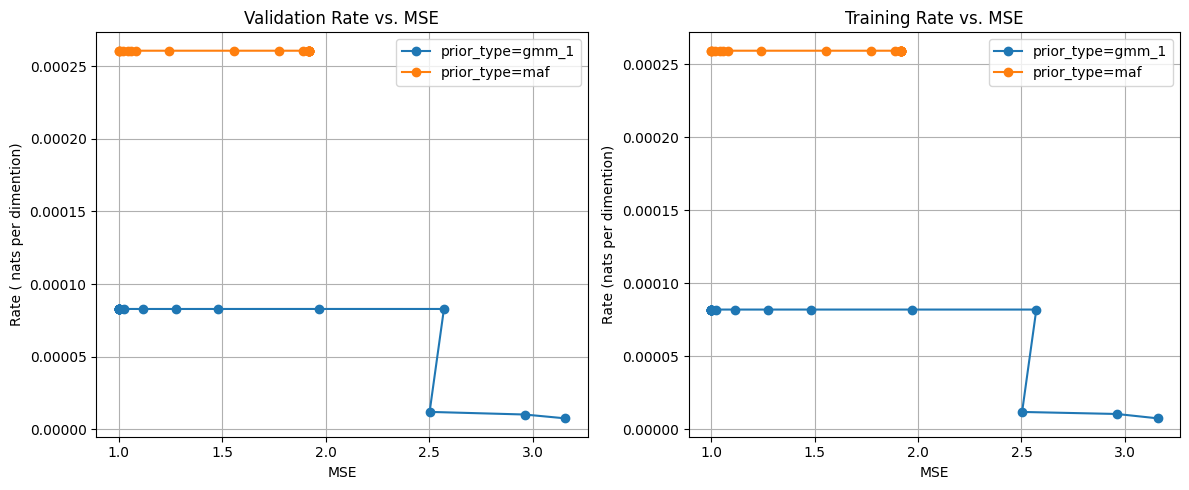

In [85]:
### pior type 별 RD 한번에 그리기
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob


# directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_normalized_2_d={dim}_b={b}_e={e}'
epochs_name = [100, 100]
batchs = [1024, 1024]
units=['2000_2000', '2000_2000']
dims = [2048, 2048]
epoch = 99
prior_types = ['prior_type=gmm_1', 'prior_type=maf']

total_data = {}
def get_rate_mse(e, data):
    for entry in data:
        if entry['epoch'] == e:
            return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
    return None, None, None, None  # 해당 epoch이 없을 경우

for i in range(len(prior_types)):
    e = epochs_name[i]
    unit = units[i]
    dim = dims[i]
    b = batchs[i]
    prior = prior_types[i]

    directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_normalized_2_d={dim}_b={b}_e={e}'
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path) and f'units={unit}' in file_path and prior in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if (f'lmbda={l}' in file_path) and f'units={unit}' in file_path and prior in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[l].append(json.loads(line))
        
    data = [get_rate_mse(epoch, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
            
    # for i in range(len(lmbdas)):
    #     print(data[i], lmbdas[i])
    # print(f'dim={dim}')
    # if dim == 2048:
    #     print(len(data))
    #     # data = data[:30]
    total_data[prior] = data

def divide_non_none_elements(input_list, n):
    # 각 요소가 None이 아닐 경우 n으로 나누고, None일 경우 그대로 유지
    # return [x / n if x is not None else x for x in input_list]
    return [x / n for x in input_list if x is not None]
plt.figure(figsize=(12, 5))

# 첫 번째 서브플롯: validation 그래프
plt.subplot(1, 2, 1)  # 2행 1열에서 첫 번째 위치
for i in range(len(prior_types)):
    e = epochs_name[i]
    unit = units[i]
    dim = dims[i]
    b = batchs[i]
    prior = prior_types[i]

    val_rate = [entry[0] for entry in total_data[prior]]
    val_mse = [entry[1] for entry in total_data[prior]]

    val_rate = divide_non_none_elements(val_rate, dim)
    val_mse = divide_non_none_elements(val_mse, 1)

    plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=f'{prior}')
    
plt.title(f'Validation Rate vs. MSE')
plt.xlabel('MSE')
plt.ylabel('Rate ( nats per dimention)')
plt.legend()
plt.grid(True)

# 두 번째 서브플롯: training 그래프
plt.subplot(1, 2, 2)  # 2행 1열에서 두 번째 위치
for i in range(len(prior_types)):
    e = epochs_name[i]
    unit = units[i]
    dim = dims[i]
    b = batchs[i]
    prior = prior_types[i]

    rate = [entry[2] for entry in total_data[prior]]
    mse = [entry[3] for entry in total_data[prior]]

    rate = divide_non_none_elements(rate, dim)
    mse = divide_non_none_elements(mse, 1)
    
    plt.plot(mse, rate, marker='o', linestyle='-', label=f'{prior}')
plt.title(f'Training Rate vs. MSE')
plt.xlabel('MSE')
plt.ylabel('Rate (nats per dimention)')
plt.legend()
plt.grid(True)

# 서브플롯 전체 보여주기
plt.tight_layout()
plt.show()


[1e-20, 1e-19, 1e-18, 1e-17, 1e-15, 1e-14, 1e-13, 1e-11, 1e-10, 1e-09, 1e-07, 1e-06, 0.0001, 0.01, 10.0]
(None, None, None, None) 1e-20
(None, None, None, None) 1e-19
(0.000191821, 2.7017, 0.000125424, 2.69581) 1e-18
(None, None, None, None) 1e-17
(0.000185508, 2.70325, 0.000121844, 2.69736) 1e-15
(None, None, None, None) 1e-14
(None, None, None, None) 1e-13
(0.000200887, 2.51599, 0.000126944, 2.51011) 1e-11
(0.000179077, 1.19995, 0.000123585, 1.19433) 1e-10
(None, None, None, None) 1e-09
(None, None, None, None) 1e-07
(None, None, None, None) 1e-06
(None, None, None, None) 0.0001
(None, None, None, None) 0.01
(None, None, None, None) 10.0
dim=512
[1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0]
(0.000258756, 2.58399, 0.000345426, 2.5805) 1e-20
(None, None, None, None) 1e-19
(0.000267696, 2.58219, 0.000340133, 2.57876) 1e-18
(None, None, None, No

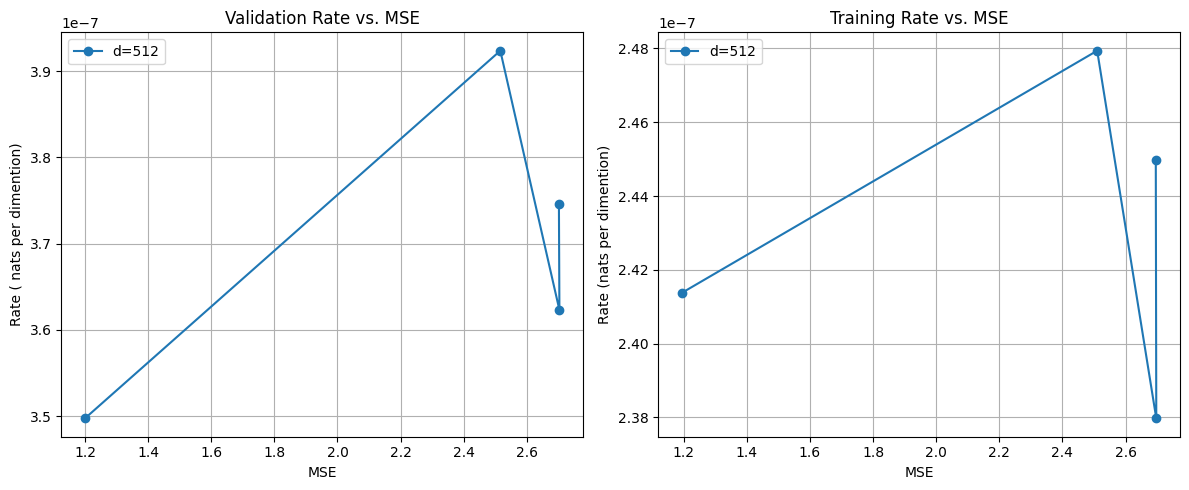

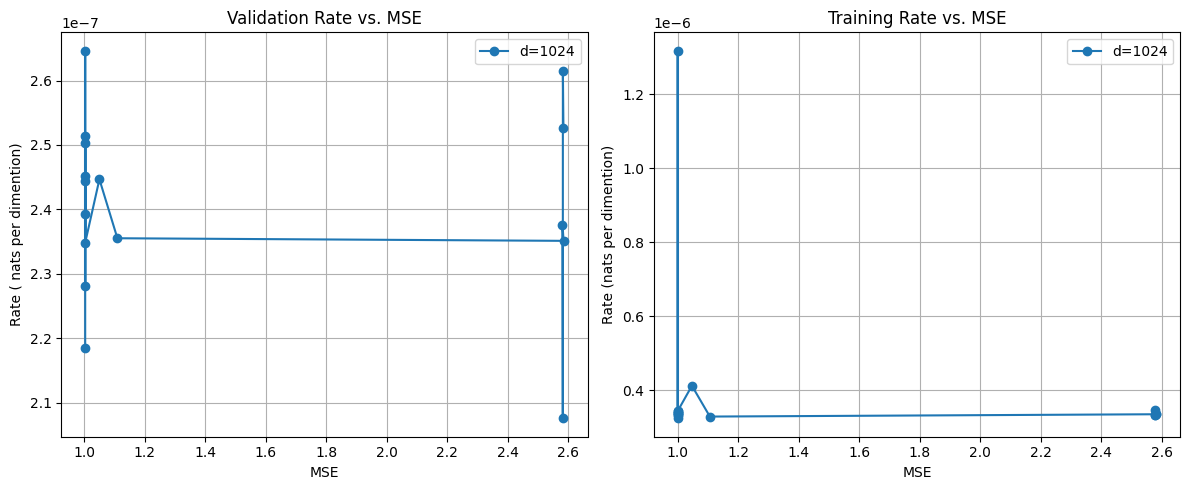

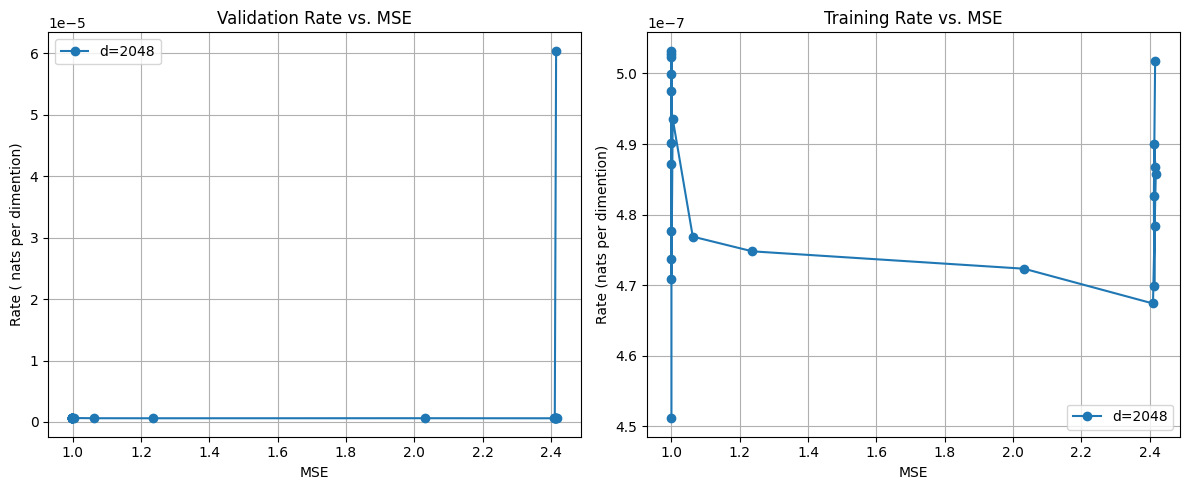

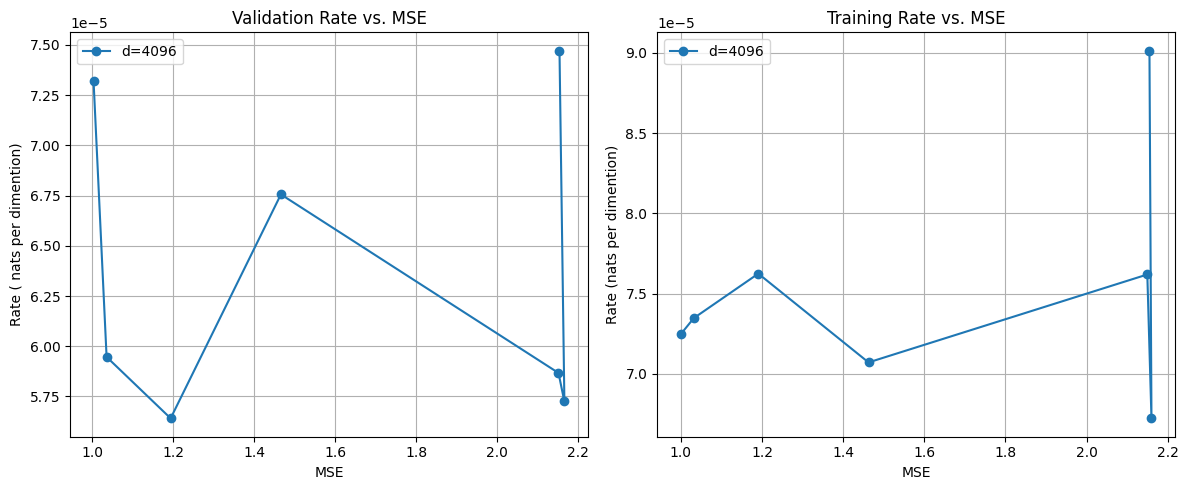

In [79]:
### dimention 별로 RD 따로 그리기
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob

# 디렉토리 경로 설정

# directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d={dim}_b=1024'
# epochs = [88, 19, 99, 19, 19, 19]
# units=['500_500', '1000_1000_1000', '500_500', '1000_1000_1000', '1000_1000_1000', '1000_1000_1000']
# dims = [32, 128, 256, 512, 1024, 2048]

# directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_normalized_d={dim}_b={b}_e={epoch}'
epochs_name = [50, 50, 50, 100]
batchs = [1024, 1024, 1024, 512]
units=['2000_2000_2000', '2000_2000_2000', '2000_2000_2000', '2000_2000_2000']
dims = [512, 1024, 2048, 4096]
epoch = 49
total_data = {}
def get_rate_mse(e, data):
    for entry in data:
        if entry['epoch'] == e:
            return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
    return None, None, None, None  # 해당 epoch이 없을 경우

for i in range(len(dims)):
    e = epochs_name[i]
    unit = units[i]
    dim = dims[i]
    b = batchs[i]

    directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_normalized_d={dim}_b={b}_e={e}'
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path) and f'units={unit}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if (f'lmbda={l}' in file_path) and f'units={unit}'  in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[l].append(json.loads(line))
        
    data = [get_rate_mse(epoch, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
            
    for i in range(len(lmbdas)):
        print(data[i], lmbdas[i])
    print(f'dim={dim}')
    if dim == 2048:
        print(len(data))
        # data = data[:30]
    total_data[dim] = data

def divide_non_none_elements(input_list, n):
    # 각 요소가 None이 아닐 경우 n으로 나누고, None일 경우 그대로 유지
    # return [x / n if x is not None else x for x in input_list]
    return [x / n for x in input_list if x is not None]

for i in range(len(dims)):
    epoch = epochs[i]
    unit = units[i]
    dim = dims[i]

    val_rate = [entry[0] for entry in total_data[dim]]
    val_mse = [entry[1] for entry in total_data[dim]]

    val_rate = divide_non_none_elements(val_rate, dim)
    val_mse = divide_non_none_elements(val_mse, 1)

    plt.figure(figsize=(12, 5))

    # 첫 번째 서브플롯: validation 그래프
    plt.subplot(1, 2, 1)  # 2행 1열에서 첫 번째 위치

    plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=f'd={dim}')
    
    plt.title(f'Validation Rate vs. MSE')
    plt.xlabel('MSE')
    plt.ylabel('Rate ( nats per dimention)')
    plt.legend()
    plt.grid(True)

# 두 번째 서브플롯: training 그래프
    plt.subplot(1, 2, 2)  # 2행 1열에서 두 번째 위치

    rate = [entry[2] for entry in total_data[dim]]
    mse = [entry[3] for entry in total_data[dim]]
    rate = divide_non_none_elements(rate, dim)
    mse = divide_non_none_elements(mse, 1)
    
    plt.plot(mse, rate, marker='o', linestyle='-', label=f'd={dim}')
    plt.title(f'Training Rate vs. MSE')
    plt.xlabel('MSE')
    plt.ylabel('Rate (nats per dimention)')
    plt.legend()
    plt.grid(True)

    # 서브플롯 전체 보여주기
    plt.tight_layout()
    plt.show()


[1e-20, 3e-20, 1e-19, 3e-19, 1e-18, 3e-18, 1e-17, 3e-17, 1e-16, 3e-16, 1e-15, 3e-15, 1e-14, 3e-14, 1e-13, 3e-13, 1e-12, 3e-12, 1e-11, 3e-11, 1e-10, 3e-10, 1e-09, 3e-09, 1e-08, 3e-08, 1e-07, 3e-07, 1e-06, 3e-06, 1e-05, 3e-05]
1000_1000_1000
(0.000131427, 1.72741, 0.000237365, 1.7274) 1e-20
(9.43458e-05, 1.72759, 0.00023428, 1.7274) 3e-20
(0.000129855, 1.72762, 0.000232025, 1.72739) 1e-19
(0.000108157, 1.72756, 0.000231256, 1.72739) 3e-19
(0.00011743, 1.72753, 0.00023652, 1.72739) 1e-18
(0.000107346, 1.72746, 0.000234326, 1.72739) 3e-18
(0.000102901, 1.72761, 0.00024014, 1.72739) 1e-17
(0.00011781, 1.72755, 0.00023458, 1.72739) 3e-17
(0.000142158, 1.72749, 0.000235899, 1.7274) 1e-16
(0.000125053, 1.72756, 0.000234051, 1.72739) 3e-16
(0.000134038, 1.72758, 0.000232203, 1.72739) 1e-15
(0.000124204, 1.72759, 0.000233819, 1.72739) 3e-15
(0.000156009, 1.72746, 0.000236337, 1.72739) 1e-14
(0.00013503, 1.72758, 0.000234878, 1.7274) 3e-14
(0.000114067, 1.7276, 0.000235131, 1.72739) 1e-13
(0.0001

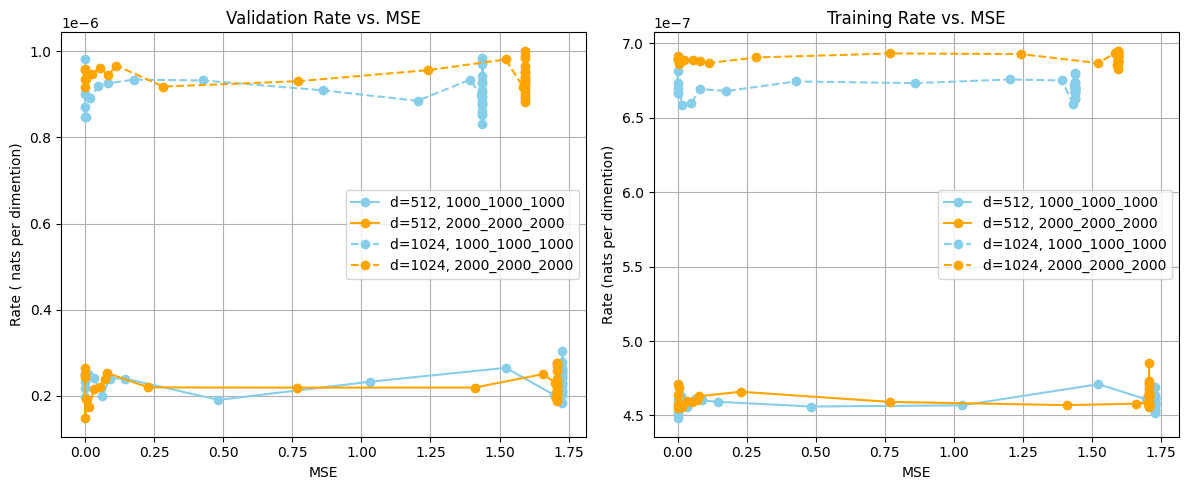

In [108]:
### Encoder Decoder 별로 RD 그리기
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob

directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=512_b=1024'
units=['1000_1000_1000', '2000_2000_2000']
dim = 512
epoch = 19

# directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=1024_b=1024'
# # units=['500_500', '1000_1000_1000', '2000_2000_2000']
# units=['1000_1000_1000', '2000_2000_2000']
# dim = 1024
# epoch = 19

# directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=2048_b=1024'
# # units=['500_500', '1000_1000_1000', '2000_2000_2000']
# # units=['500_500']
# units=['500_500', '1000_1000_1000']
# dim = 2048
# epoch = 99

total_data = {}
def get_rate_mse(e, data):
    for entry in data:
        if entry['epoch'] == e:
            return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
    return None, None, None, None  # 해당 epoch이 없을 경우

for i in range(len(units)):

    unit = units[i]
    
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path) and f'units={unit}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if (f'lmbda={l}' in file_path) and f'units={unit}'  in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[l].append(json.loads(line))
        
    data = [get_rate_mse(epoch, data_dict[l]) for l in lmbdas]
    
    print(unit)
    for i in range(len(lmbdas)):
        print(data[i], lmbdas[i])
        
    total_data[unit] = data

def divide_non_none_elements(input_list, n):
    # 각 요소가 None이 아닐 경우 n으로 나누고, None일 경우 그대로 유지
    return [x / n if x is not None else x for x in input_list]

plt.figure(figsize=(12, 5))
# plt.suptitle(f'd = {dim}')
# 첫 번째 서브플롯: validation 그래프
plt.subplot(1, 2, 1)  # 2행 1열에서 첫 번째 위치
colors = ['skyblue', 'orange']
for i in range(len(units)):
    unit = units[i]
    val_rate = [entry[0] for entry in total_data[unit]]
    val_mse = [entry[1] for entry in total_data[unit]]
    val_rate = divide_non_none_elements(val_rate, dim)
    color = colors[i % len(colors)]
    plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=f'd={dim}, {unit}', color=color)
plt.title(f'Validation Rate vs. MSE')
plt.xlabel('MSE')
plt.ylabel('Rate ( nats per dimention)')
plt.legend()
plt.grid(True)

# 두 번째 서브플롯: training 그래프
plt.subplot(1, 2, 2)  # 2행 1열에서 두 번째 위치
for i in range(len(units)):
    unit = units[i]
    rate = [entry[2] for entry in total_data[unit]]
    mse = [entry[3] for entry in total_data[unit]]
    rate = divide_non_none_elements(rate, dim)
    color = colors[i % len(colors)]
    plt.plot(mse, rate, marker='o', linestyle='-', label=f'd={dim}, {unit}', color=color)
plt.title(f'Training Rate vs. MSE')
plt.xlabel('MSE')
plt.ylabel('Rate (nats per dimention)')
plt.legend()
plt.grid(True)


directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=1024_b=1024'
# units=['500_500', '1000_1000_1000', '2000_2000_2000']
units=['1000_1000_1000', '2000_2000_2000']
dim = 1024
epoch = 19

total_data = {}
def get_rate_mse(e, data):
    for entry in data:
        if entry['epoch'] == e:
            return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
    return None, None, None, None  # 해당 epoch이 없을 경우

for i in range(len(units)):

    unit = units[i]
    
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path) and f'units={unit}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if (f'lmbda={l}' in file_path) and f'units={unit}'  in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[l].append(json.loads(line))
        
    data = [get_rate_mse(epoch, data_dict[l]) for l in lmbdas]
    
    print(unit)
    for i in range(len(lmbdas)):
        print(data[i], lmbdas[i])
        
    total_data[unit] = data

def divide_non_none_elements(input_list, n):
    # 각 요소가 None이 아닐 경우 n으로 나누고, None일 경우 그대로 유지
    return [x / n if x is not None else x for x in input_list]


plt.subplot(1, 2, 1)  # 2행 1열에서 첫 번째 위치
for i in range(len(units)):
    # linestyle = '-' if i % 2 == 0 else '--'
    unit = units[i]
    val_rate = [entry[0] for entry in total_data[unit]]
    val_mse = [entry[1] for entry in total_data[unit]]
    val_rate = divide_non_none_elements(val_rate, dim)
    color = colors[i % len(colors)]
    plt.plot(val_mse, val_rate, marker='o', linestyle='--', label=f'd={dim}, {unit}', color=color)
plt.legend()

# 두 번째 서브플롯: training 그래프
plt.subplot(1, 2, 2)  # 2행 1열에서 두 번째 위치
for i in range(len(units)):
    # linestyle = '-' if i % 2 == 0 else '--'
    unit = units[i]
    rate = [entry[2] for entry in total_data[unit]]
    mse = [entry[3] for entry in total_data[unit]]
    rate = divide_non_none_elements(rate, dim)
    color = colors[i % len(colors)]
    plt.plot(mse, rate, marker='o', linestyle="--", label=f'd={dim}, {unit}', color=color)
plt.legend()
plt.legend()

# 서브플롯 전체 보여주기
plt.tight_layout()
plt.show()


[1e-12, 3e-12, 1e-11, 3e-11, 1e-10, 3e-10, 1e-09, 3e-09, 1e-08, 3e-08, 1e-07, 3e-07, 1e-06, 3e-06, 1e-05, 3e-05, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]


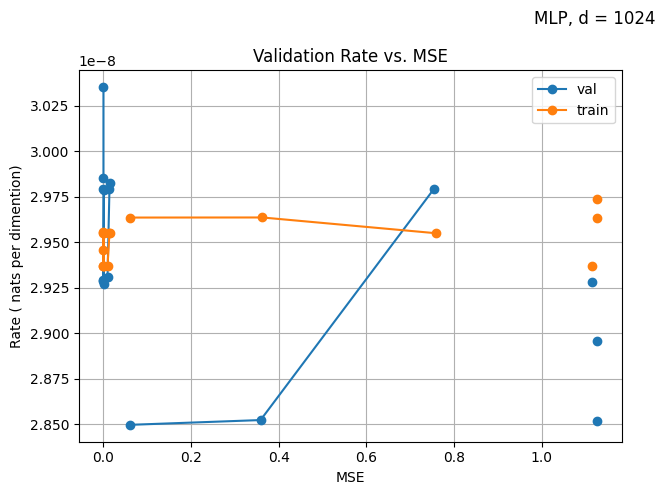

2.963134765625e-08 1.12654 2.851884765625e-08 1.12653 1e-12
None None None None 3e-12
2.974052734375e-08 1.12644 2.8958984375e-08 1.12632 1e-11
None None None None 3e-11
2.9369140625e-08 1.11433 2.92810546875e-08 1.1142 1e-10
None None None None 3e-10
2.955009765625e-08 0.758081 2.979560546875e-08 0.754648 1e-09
2.963662109375e-08 0.362692 2.85220703125e-08 0.35851 3e-09
2.96361328125e-08 0.0613371 2.849580078125e-08 0.0599159 1e-08
None None None None 3e-08
2.95505859375e-08 0.0161685 2.982373046875e-08 0.0161501 1e-07
2.955029296875e-08 0.0138212 2.979140625e-08 0.0137797 3e-07
2.936953125e-08 0.00940517 2.93064453125e-08 0.00934082 1e-06
None None None None 3e-06
2.955068359375e-08 0.00135425 2.97884765625e-08 0.0013135 1e-05
2.936923828125e-08 0.000262259 2.927109375e-08 0.000245817 3e-05
2.93693359375e-08 0.000157387 2.92890625e-08 0.000143427 0.0001
None None None None 0.0003
2.955185546875e-08 0.000140708 2.979443359375e-08 0.000127207 0.001
2.93701171875e-08 0.000140182 2.92933

In [2]:
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob

# 디렉토리 경로 설정

dim = 1024
epoch = 50
unit='2000_2000'

# directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_normalized_2_d={dim}_b=512_e=100'  # 원하는 디렉토리 경로로 변경
# directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/mlp_d=1024_b=1024_e=100'
directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3-8B_d1024_b1024_e600'
# directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_d=2048_b=1024_e=100'
# directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-7b_attn_d=2048_b=1024'

file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

dirlist  = os.listdir(directory)
# lmbdas = set([0])
lmbdas = set([])
for d in dirlist:
    if not 'lmbda=' in d:
        continue
    start = d.find('lmbda=') + len('lmbda=')
    end = d.find('-encoder', start)
    lmbda_value = float(d[start:end])
    # print(lmbda_value)
    lmbdas.add(lmbda_value)

# print(lmbdas)
lmbdas = sorted(lmbdas)
# lmbdas = lmbdas[1:19]
print(lmbdas)
data_dict = {}

if 0 in lmbdas:
    for file_path in file_list:
        if (not f'lmbda' in file_path) and f'units={unit}' in file_path:
            with open(file_path, 'r') as f:
                for line in f:
                    data_dict[0].append(json.loads(line))

for l in lmbdas: 
    data_dict[l] = []
for l in lmbdas:
    for file_path in file_list:
        if (f'lmbda={l}' in file_path) and f'units={unit}'  in file_path:
            with open(file_path, 'r') as f:
                for line in f:
                    data_dict[l].append(json.loads(line))


def get_rate_mse(e, data):
    for entry in data:
        if entry['epoch'] == e:
            return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
    return None, None, None, None  # 해당 epoch이 없을 경우

# sub_lmbdas = [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]
    
data = [get_rate_mse(epoch, data_dict[l]) for l in lmbdas]
# sorted_data = sorted(data, key=lambda x: x[1])

def divide_non_none_elements(input_list, n):
    # 각 요소가 None이 아닐 경우 n으로 나누고, None일 경우 그대로 유지
    return [x / n if x is not None else x for x in input_list]

val_rate = [entry[0] for entry in data]
val_mse = [entry[1] for entry in data]
rate = [entry[2] for entry in data]
mse = [entry[3] for entry in data]

val_rate = divide_non_none_elements(val_rate, dim)
rate = divide_non_none_elements(rate, dim)

plt.figure(figsize=(12, 5))
plt.suptitle(f'MLP, d = {dim}')

# 첫 번째 서브플롯: validation 그래프
plt.subplot(1, 2, 1)  # 2행 1열에서 첫 번째 위치
plt.plot(val_mse, val_rate, marker='o', linestyle='-', label='val')
plt.plot(mse, rate, marker='o', linestyle='-', label='train')

plt.title(f'Validation Rate vs. MSE')
plt.xlabel('MSE')
plt.ylabel('Rate ( nats per dimention)')
plt.legend()
plt.grid(True)

# 두 번째 서브플롯: training 그래프
# plt.subplot(1, 2, 2)  # 2행 1열에서 두 번째 위치
# plt.plot(mse, rate, marker='o', linestyle='-', c='r')
# plt.title(f'Training Rate vs. MSE')
# plt.xlabel('MSE')
# plt.ylabel('Rate ( nats per dimention)')
# # plt.legend()
# plt.grid(True)

# 서브플롯 전체 보여주기
plt.tight_layout()
plt.show()

for i in range(len(lmbdas)):
    print(rate[i], mse[i], val_rate[i], val_mse[i], lmbdas[i])

In [ ]:
for l in lmbdas:
# epoch별 데이터 추출
    data_dict[l] = sorted(data_dict[l], key=lambda x: x['epoch'])
    
    epochs = [entry['epoch'] for entry in data_dict[l]]
    loss = [entry['loss'] for entry in data_dict[l]]
    val_loss = [entry['val_loss'] for entry in data_dict[l]]
    rate = [entry['rate'] for entry in data_dict[l]]
    val_rate = [entry['val_rate'] for entry in data_dict[l]]
    mse = [entry['mse'] for entry in data_dict[l]]
    val_mse = [entry['val_mse'] for entry in data_dict[l]]
# Plot 설정
    plt.figure(figsize=(10, 6))

    # Loss Plot
    plt.subplot(3, 1, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'lmbdas={l}')
    plt.legend()

    # Rate Plot
    plt.subplot(3, 1, 2)
    plt.plot(epochs, rate, label='Training Rate')
    plt.plot(epochs, val_rate, label='Validation Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Rate')
    plt.title(f'lmbdas={l}')
    plt.legend()
    
    # mse Plot
    plt.subplot(3, 1, 3)
    plt.plot(epochs, mse, label='Training Mse')
    plt.plot(epochs, val_mse, label='Validation Mse')
    plt.xlabel('Epoch')
    plt.ylabel('Mse')
    plt.title(f'lmbdas={l}')
    plt.legend()

    plt.tight_layout()
    plt.show()
